# 4 Image processing
This is the fourth part of a series on how to read raster images from files,
manipulate them, display the result in a notebook and save it to a file.
I assume you have read the [first part](1-introduction.ipynb).

This part contains exercises that manipulate groups of pixels together,
inspired by Joshua T. Guerin and Debby Keen's
[PPM Image Editor](http://nifty.stanford.edu/2012/guerin-image-editor/)
assignment.
The following operations can be applied to any image,
so we'll use again their cake image, with their permission.

In [1]:
from raster import *

cake = load('cake.jpg')

I removed my solution code but kept the output images so that
you see the expected result before you attempt an exercise.
If you run all cells in one go, you will lose the outputs, so
run one cell at a time, as you work through the exercises.

## 4.1 Flip
For this exercise, flip an image vertically by reversing the order of its rows.
Contrary to the functions in the previous parts of this series,
this and the next functions should
return a new image, without changing the input.

In [2]:
def flip_v(image: Raster) -> Raster:
    """Return a new image, with the rows in reverse order."""
    pass

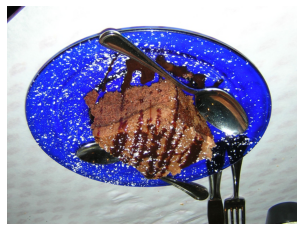

In [3]:
show(flip_v(cake))

To flip an image horizontally, reverse the order of the pixels in each row.

In [4]:
def flip_h(image: Raster) -> Raster:
    """Return a new image, with each row's pixels in reverse order."""
    pass

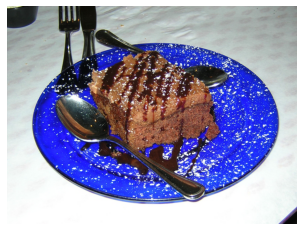

In [5]:
show(flip_h(cake))

Flipping an image horizontally and vertically rotates it by 180 degrees.

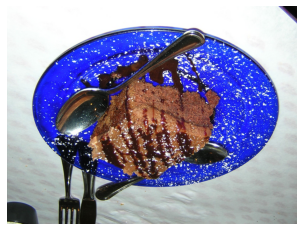

In [6]:
show(flip_v(flip_h(cake)))

**Further exercises:**

1. Write a function that flips an image vertically in place, i.e.
   modifies the image instead of returning a new one.
1. Write a function that flips an image horizontally in place.
1. Write a function that rotates an image by 180 degrees in place,
   doing a single pass over the pixels.

## 4.2 Rotate
If an image that is _w_ pixels wide and _h_ pixels high is rotated 90°,
it becomes _h_ pixels wide and _w_ pixels high.
If the image is rotated clockwise, the four corners change as follows:

Old corner | Old row | Old column | New corner | New row | New column
-:|-:|-:|-:|-:|-:
top left | 0 | 0 | top right | 0 | _h_ – 1
bottom left | _h_ – 1 | 0 | top left | 0 | 0
top right | 0 | _w_ – 1 | bottom right | _w_ – 1 | _h_ – 1
bottom right | _h_ – 1 | _w_ – 1 | bottom left | _w_ – 1 | 0

For example, the top left pixel of the original image, at row 0, column 0,
becomes the top right pixel of the rotated image, at row 0, column _h_ – 1.

You can rotate an image by first creating a monochrome image
of the correct dimensions and then copying each pixel from the original
to the rotated image.
The pixel at row _r_, column _c_ in the original image,
ends up in which row and column of the rotated image?

In [7]:
def monochrome(width: int, height: int, colour: RGB) -> Raster:
    """Return an image of the given dimensions.

    All pixels are of the given colour, a list of 3 integers from 0 to 255.
    The width and height can't be negative.
    """
    pass

def clockwise(image: Raster) -> Raster:
    """Return a copy of the image, rotated by 90 degrees clockwise."""
    rotated = monochrome(height(image), width(image), BLACK)
    pass
    return rotated

First check that your `monochrome` function works.

5 by 3 pixels


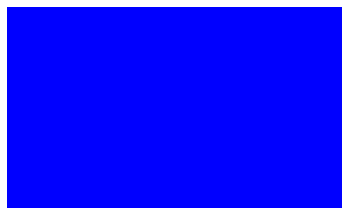

In [8]:
image = monochrome(5, 3, BLUE)
print(width(image), 'by', height(image), 'pixels')
show(image)

Then complete `clockwise` and run the next cell.

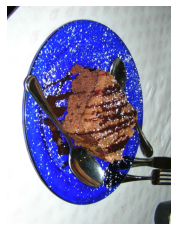

In [9]:
show(clockwise(cake))

**Further exercise:** Implement 90-degree anti-clockwise rotation.
Your function will run faster and use less memory than doing
three clockwise rotations.

## 4.3 Blur
To blur an image, we average each channel value of a pixel with
the corresponding channels of the neighbouring pixels.
A horizontal blur only looks at the left and right neighbours,
a vertical blur only at the neighbours above and below.

For example, if we have three pixels [3, 4, 5], [7, 8, 9] and [100, 200, 100],
the middle pixel becomes [36, 70, 38] because the mean of 3, 7 and 100 is 36,
rounded down, and similarly for the green and blue channels.
You must take the mean over the original pixels,
not the already blurred neighbours.

In [10]:
def blur_h(image: Raster) -> Raster:
    """Return a new image, with each pixel blurred.

    Each pixel is blurred with its original left and right neighbours.
    The first and last pixel of each row aren't blurred.
    The image width must be greater than 2.
    """
    pass

The image display must be enlarged to make the blurring visible.

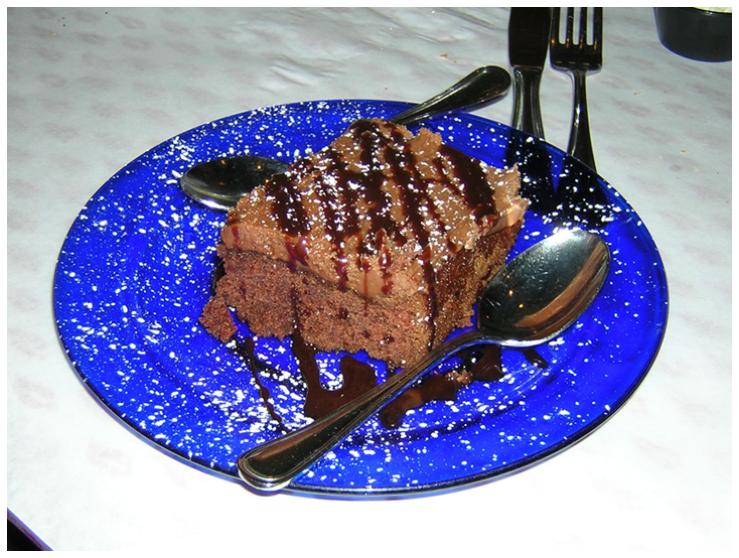

In [11]:
show(cake, 2.5)         # the original image, for comparison

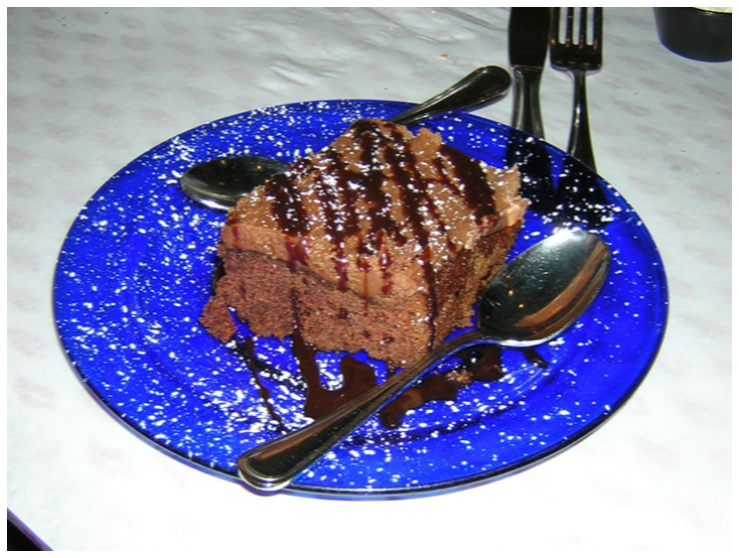

In [12]:
show(blur_h(cake), 2.5)

The icing sugar and the sauce are noticeably less crisp.

We can repeatedly blur an image for a stronger effect.

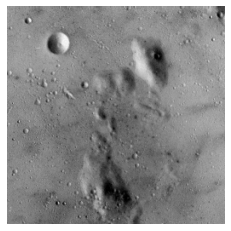

In [13]:
image = load('moon.tiff')
show(image)

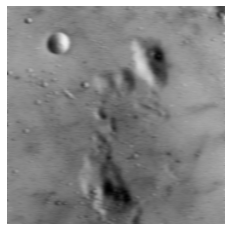

In [14]:
for _ in range(5):
    image = blur_h(image)
show(image)

**Further exercise:** Implement vertical blur.